In [2]:
from keras.applications import VGG16
import os,sys
import numpy as np
import pandas
import matplotlib.pyplot as plt
from PIL import Image
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras import optimizers
import time
import glob
import cv2

Using TensorFlow backend.
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\anaconda3\envs\rebuild_keras\lib\site-packages\tensorflo

In [3]:
from keras import backend as K

if 'tensorflow' == K.backend():
    import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.visible_device_list = "0"
set_session(tf.Session(config=config))

In [5]:
folder = os.listdir("./data/SDNET2018/D/")
image_size = 256
dense_size = len(folder)

X = []
Y = []
for index, name in enumerate(folder):
    dir = "./data/SDNET2018/D/" + name
    files = glob.glob(dir + "/*.jpg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        X.append(data)
        Y.append(index)
X = np.array(X)
Y = np.array(Y)
X = X.astype('float32')
X = X / 255.0

Y = np_utils.to_categorical(Y, dense_size)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

batch_size = 64
nb_epoch = 100

[0. 1.]


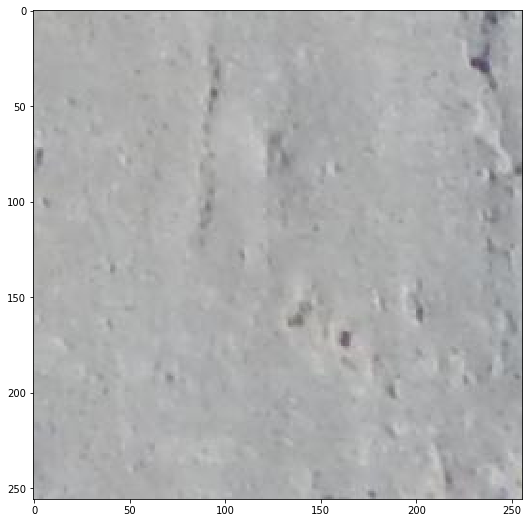

In [4]:
#print(str[0])
print(Y[7218])
fig = plt.figure(figsize=(16,9))
plt.imshow(X[7218])
plt.show()

In [6]:
model_file_name = 'model_SDNET2018_256.hdf5'
model = load_model('./model/' + model_file_name)

score = model.evaluate(X_test,y_test,verbose=1)
print("evaluate loss: {0[0]}".format(score))
print("evaluate acc: {0[1]}".format(score))

prex = model.predict(X_test)
wrong = []
w_index = []
fp = []
fn = []
a = np_utils.to_categorical(1, dense_size)
for i in range(len(X_test)):
    yi = y_test[i:i+1]
    prei = prex[i:i+1]
    if prei.argmax() != yi.argmax():
        wrong.append(i)
        w_index.append(y_test[i])
        if (y_test[i][0]) == a[0]:
            fp.append(i)
        else :
            fn.append(i)
wrong = np.array(wrong)   
wrong.astype('float32')
w_index = np.array(w_index)
fn = np.array(fn)
fp = np.array(fp)
fn.astype('float32')
fp.astype('float32')

2724/2724 [==============================] - 18s 7ms/step
evaluate loss: 0.21950022458329949
evaluate acc: 0.9309838472834068


array([ 278.,  347.,  467.,  485.,  523.,  615.,  631.,  673.,  736.,
       1140., 1245., 1317., 1319., 1367., 1437., 1471., 1493., 1523.,
       1534., 1673., 1748., 1789., 1799., 1924., 1936., 1979., 2056.,
       2202., 2535., 2544., 2700.], dtype=float32)

In [6]:
print(fp)
print('fp', len(fp))
print(fn)
print('fn', len(fn))
#print(w_index)
print('wrong',len(wrong))
#print(y_test[3][1])

[  10   73  178  212  701  731  890  993 1298 1313 1418 1496 1712 1727
 1805 2045 2061 2266 2337 2344 2378 2393 2633 2686 2700 2701]
fp 26
[  24   90  109  137  141  144  145  146  200  226  275  293  294  314
  326  338  372  386  394  404  430  444  469  479  499  505  528  536
  538  559  562  565  573  578  593  616  632  636  640  661  670  696
  702  720  729  774  798  810  841  842  852  853  866  877  880  892
  914  947  958  966  974  984 1023 1029 1040 1052 1077 1099 1102 1125
 1133 1158 1162 1165 1190 1194 1228 1237 1239 1241 1271 1297 1303 1307
 1315 1356 1357 1362 1374 1381 1428 1433 1448 1462 1468 1475 1487 1492
 1500 1523 1526 1535 1561 1563 1598 1613 1629 1633 1644 1646 1654 1707
 1714 1716 1734 1743 1764 1792 1801 1821 1892 1909 1913 1945 1989 2016
 2019 2033 2036 2068 2076 2087 2106 2180 2184 2196 2227 2230 2285 2297
 2307 2325 2351 2363 2365 2381 2392 2399 2400 2402 2432 2453 2512 2527
 2531 2538 2540 2552 2580 2595 2597 2623 2661 2665 2669 2706]
fn 166
wrong 192


In [7]:
"""
fp_dir = './data/fp_learning_256/'
fn_dir = './data/fn_learning_256/'
if os.path.exists(fp_dir)==False:os.mkdir(fp_dir)
if os.path.exists(fn_dir)==False:os.mkdir(fn_dir)
    
for i in range(len(fp)):
    im = (X_test[fp[i]]*255)
    img = Image.fromarray(np.uint8(im))
    img.save(fp_dir + '{}.jpg'.format(i))
    
for i in range(len(fn)):
    im = (X_test[fn[i]]*255)
    img = Image.fromarray(np.uint8(im))
    img.save(fn_dir + '{}.jpg'.format(i))
"""

"\nfp_dir = './data/fp_learning_256/'\nfn_dir = './data/fn_learning_256/'\nif os.path.exists(fp_dir)==False:os.mkdir(fp_dir)\nif os.path.exists(fn_dir)==False:os.mkdir(fn_dir)\n    \nfor i in range(len(fp)):\n    im = (X_test[fp[i]]*255)\n    img = Image.fromarray(np.uint8(im))\n    img.save(fp_dir + '{}.jpg'.format(i))\n    \nfor i in range(len(fn)):\n    im = (X_test[fn[i]]*255)\n    img = Image.fromarray(np.uint8(im))\n    img.save(fn_dir + '{}.jpg'.format(i))\n"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


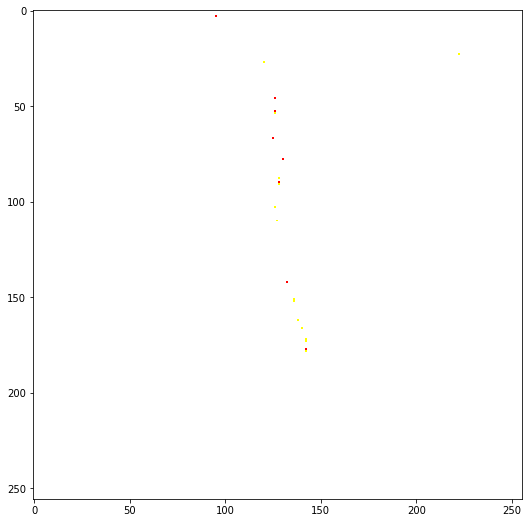

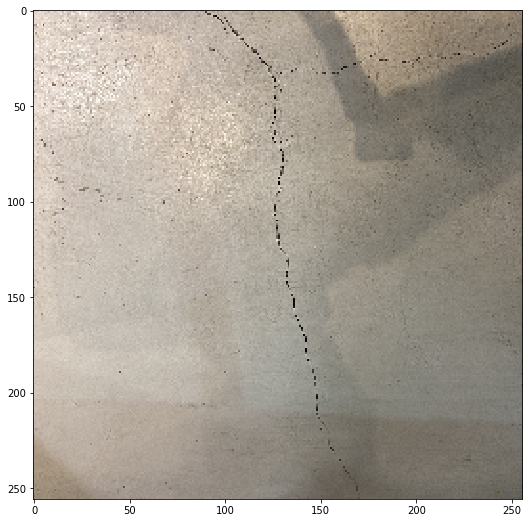

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0]


In [25]:
crack = []
files = glob.glob("./data/crack3/*.jpg")
for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        crack.append(data)
crack = np.array(crack)
crack = crack.astype('float32')
crack = crack / 255.0

pos = []
neg = []
predict = model.predict(crack)
max = predict.argmax(axis = 1)
for i in range(len(max)):
    if max[i] == 0:
        pos.append(crack[i])
    else :
        neg.append(crack[i])
pos = np.array(pos) 
neg = np.array(neg)
pos.astype('float32')
neg.astype('float32')
        
print(max)

In [19]:
pos_dir = './data/positive/'
neg_dir = './data/negative/'
if os.path.exists(pos_dir)==False:os.mkdir(pos_dir)
if os.path.exists(neg_dir)==False:os.mkdir(neg_dir)
    
for i in range(len(pos)):
    im = (pos[i]*255)
    img = Image.fromarray(np.uint8(im))
    img.save( pos_dir + '{}.jpg'.format(i))

for i in range(len(neg)):
    im = (neg[i]*255)
    img = Image.fromarray(np.uint8(im))
    img.save(neg_dir + '{}.jpg'.format(i))

[0. 1.]


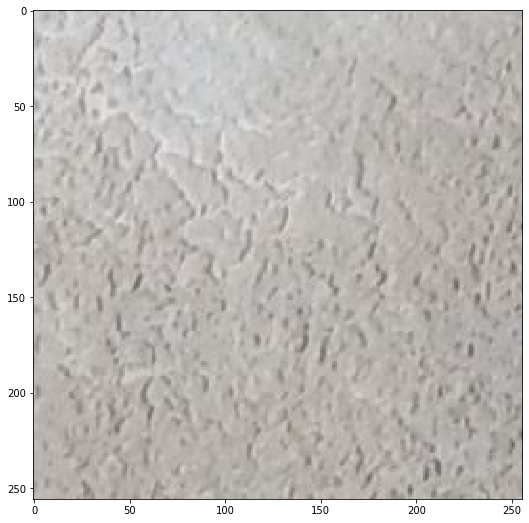

In [11]:
print(y_test[fp[1]])
fig = plt.figure(figsize=(16,9))
plt.imshow(X_test[fp[1]])
plt.show()